# **Effect of Regularization on Overfitting**

# **Objective:**

To demonstrate how **L2 regularization (Ridge Regression)** helps reduce overfitting by penalizing large weights in a model.

# Import Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Generate Non-linear Data

In [21]:
# Create a simple non-linear dataset
np.random.seed(42)
x = np.linspace(0, 6, 40)
y = 2 + 3 * np.sin(x) + np.random.randn(40) * 0.5

# Reshape for sklearn
x = x.reshape(-1, 1)

# Split Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


# Create Polynomial Features

In [22]:
poly_degree = 15  # High degree to show overfitting
poly = PolynomialFeatures(degree=poly_degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Train Two Models

In [23]:
# Without Regularization (Normal Linear Regression)
lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)

# With Regularization (Ridge Regression)
ridge_reg = Ridge(alpha=1.0)  # alpha = λ = regularization strength
ridge_reg.fit(x_train_poly, y_train)

Ridge()

# Make Predictions

In [24]:
x_plot = np.linspace(0, 6, 100).reshape(-1, 1)
x_plot_poly = poly.transform(x_plot)

y_pred_no_reg = lin_reg.predict(x_plot_poly)
y_pred_ridge = ridge_reg.predict(x_plot_poly)

# Visualize the Effect of Regularization

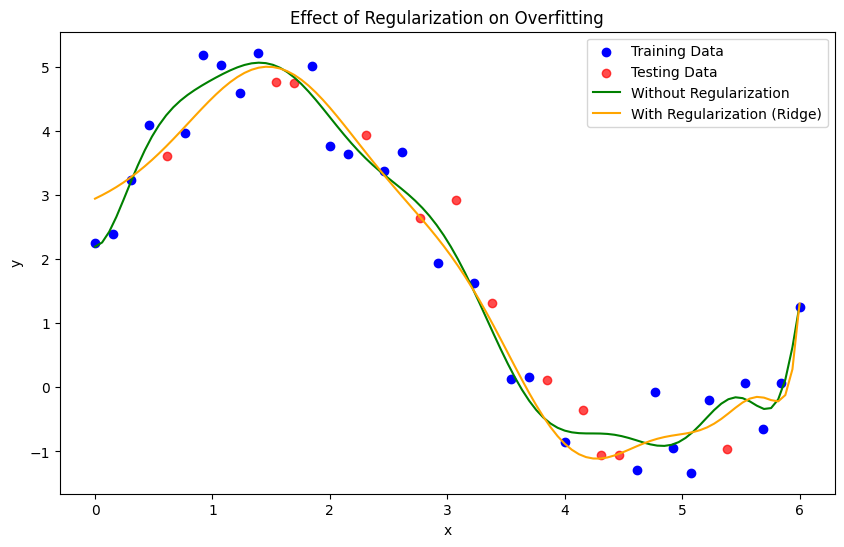

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Testing Data', alpha=0.7)
plt.plot(x_plot, y_pred_no_reg, color='green', label='Without Regularization')
plt.plot(x_plot, y_pred_ridge, color='orange', label='With Regularization (Ridge)')
plt.title("Effect of Regularization on Overfitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Evaluate Model Performance

In [26]:
train_mse_no_reg = mean_squared_error(y_train, lin_reg.predict(x_train_poly))
test_mse_no_reg = mean_squared_error(y_test, lin_reg.predict(x_test_poly))

train_mse_ridge = mean_squared_error(y_train, ridge_reg.predict(x_train_poly))
test_mse_ridge = mean_squared_error(y_test, ridge_reg.predict(x_test_poly))

print("Without Regularization:")
print(f"  Train MSE: {train_mse_no_reg:.4f}")
print(f"  Test MSE:  {test_mse_no_reg:.4f}")

print("\nWith Regularization (Ridge):")
print(f"  Train MSE: {train_mse_ridge:.4f}")
print(f"  Test MSE:  {test_mse_ridge:.4f}")

Without Regularization:
  Train MSE: 0.1306
  Test MSE:  0.2463

With Regularization (Ridge):
  Train MSE: 0.1909
  Test MSE:  0.2068


**Without Regularization**: The model will perfectly fit the training points (low training error) but curve wildly → high test error = overfitting.

**With Regularization**: The Ridge model smooths the curve, slightly increases training error but significantly reduces test error → better generalization.

Try changing:

   ridge_reg = Ridge(alpha=10)
   
   and

   ridge_reg = Ridge(alpha=0.1)

   to see how increasing/decreasing λ (alpha) affects model smoothness and test error.

